In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

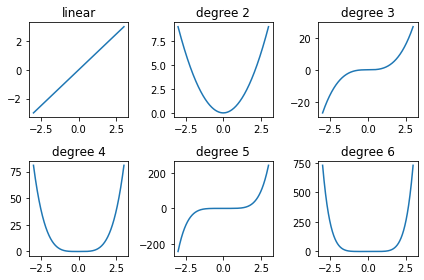

In [10]:
x = np.linspace(-3,3,1000)
# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')


# tidy layout
plt.tight_layout()

    Hours_Studied  Test_Grade
0             0.5          20
1             1.0          21
2             2.0          22
3             3.0          23
4             4.0          25
5             5.0          37
6             6.0          48
7             7.0          56
8             8.0          67
9             9.0          76
10           10.0          90
11           11.0          89
12           12.0          90
Correlation Matrix: 


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.974868
Test_Grade,0.974868,1.000000


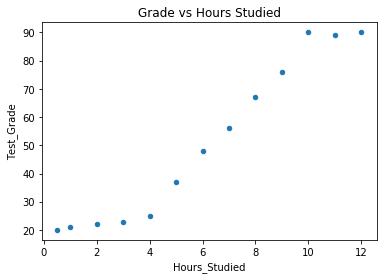

In [11]:
# Load data
df = pd.read_csv('D:\MLNOTES\mastering-ml-w-python-in-six-steps-master\mastering-ml-w-python-in-six-steps-master\Chapter_3_Code\Code\Data/Grade_Set_2.csv')
print(df)

# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')

# check the correlation between variables
print("Correlation Matrix: ")
df.corr()

Intercept:  7.27106067219556
Coefficient:  [7.25447403]
Manual prdiction : 49.207394035760004
R Squared:  0.9503677766997879


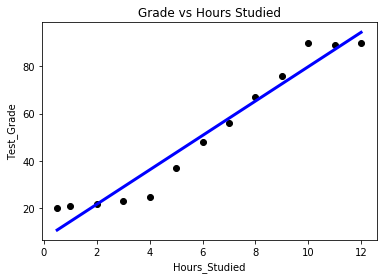

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Create linear regression object
lr =LinearRegression()

x= df.Hours_Studied[:, np.newaxis]           # independent variable
y= df.Test_Grade                             # dependent variable 

# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_) 
print("Coefficient: ", lr.coef_)

# manual prediction for a given value of x
print("Manual prdiction :", 5.74120829576 + 7.24436429*6) 
# predict using the built-in function
#print("Using predict function: ", lr.predict(6)) 

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

print("R Squared: ", r2_score(y, lr.predict(x))) 

R-squared for degree 1 =  0.9503677766997879
R-squared for degree 2 =  0.9608726568678714
R-squared for degree 3 =  0.9938323120374665
R-squared for degree 4 =  0.9955000184096712
R-squared for degree 5 =  0.9956204913897357


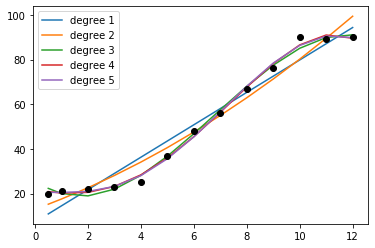

In [19]:
lr = LinearRegression()

x= df.Hours_Studied        # independent variable
y= df.Test_Grade           # dependent variable 

# NumPy's vander function will return powers of the input vector
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y);
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg));
    plt.legend(loc=2);
    print("R-squared for degree " + str(deg) + " = ",  r2_score(y, y_lr)) 
plt.plot(x, y, 'ok')

R Squared using built-in function:  0.9955000184096712


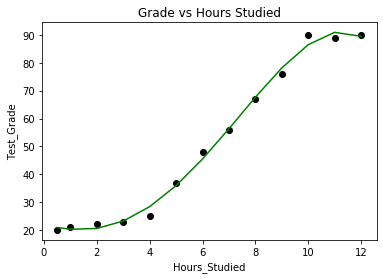

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade                   # dependent variable 

degree = 4
model = make_pipeline(PolynomialFeatures(degree), lr)


model.fit(x, y)

plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='green')
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

print("R Squared using built-in function: ", r2_score(y, model.predict(x))) 